# Exercise 1

## Problem 1
In this problem we will loog at a very simple machine learning pipeline.
We will load a dataset, perform some exploratory data analysis, train some models, and evaluate their performance.

We will work with the California Housing dataset from https://github.com/ageron/handson-ml2/tree/master/datasets/housing.

Our goal is to predict the `median_house_value` by using the other predictors (i.e., columns) of the dataset.

### 1. Load housing dataset

Import the `numpy` library as `np`, `pandas` library as `pd`, and `matplotlib.pyplot` as `plt`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the housing dataset `housing.csv` using the `read_csv()` function from `pandas`. Name the dataframe `housing`.


In [3]:
housing = pd.read_csv("housing.csv")

### 2. Quick look at the data
The `housing` dataframe is an object of class `DataFrame`. This class has several methods that allow you to look and modify the data. 
Here, we try to understand the dataset by calling the methods `head()`, `info()`, and `describe()`.

* What is the difference between the three methods?
* What are the data types of the columns (i.e., quantitative or qualitative)?
* Are there missing values (e.g., NAs)?
* Count the number of rows and column in `housing`.

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.isnull().any()
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
housing.shape

(20640, 10)

### 3. Exploratory data analysis

We want to better understand the dataset at hand by performing some exploratory data analysis.

Import the `scatter_matrix` function from the `plotting` submodule of `pandas`.

In [9]:
from pandas.plotting import scatter_matrix

Call the `scatter_matrix` and `corr` function on the quantitative variables of the `housing` dataset.

In [10]:
housing_quant = housing.drop("ocean_proximity", axis = 'columns')
housing_quant.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


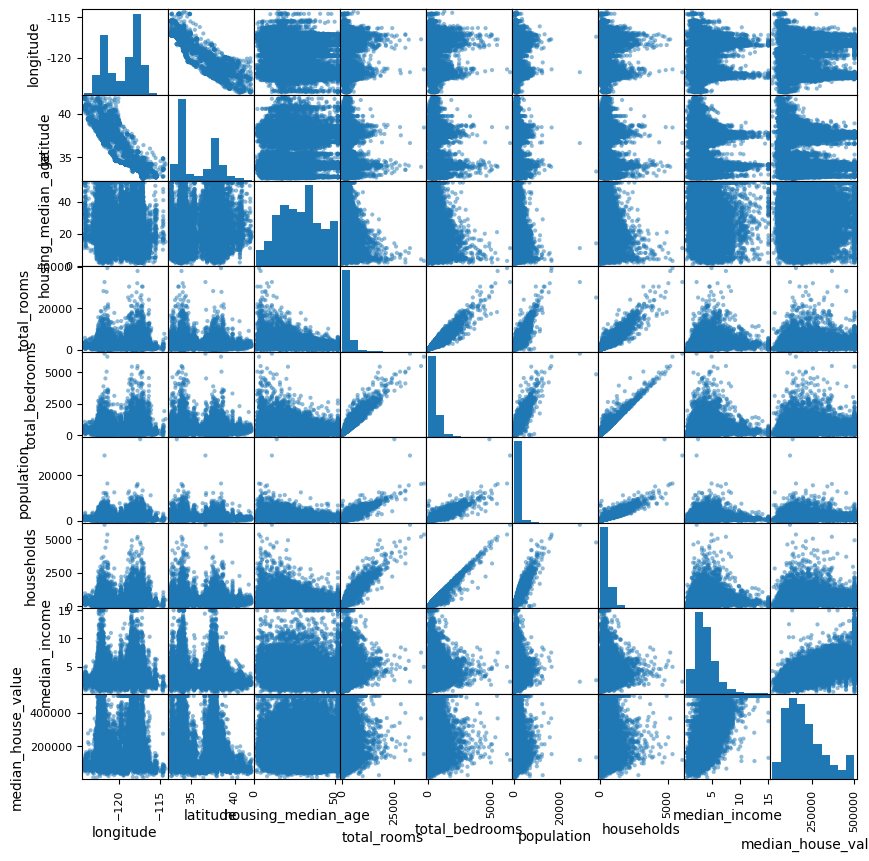

In [11]:

scatter_matrix(housing_quant, figsize = (10, 10));

In [12]:
housing_quant.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Can you explain the strong negative correlation between `latitude` and `longitude`?

<Axes: xlabel='longitude', ylabel='latitude'>

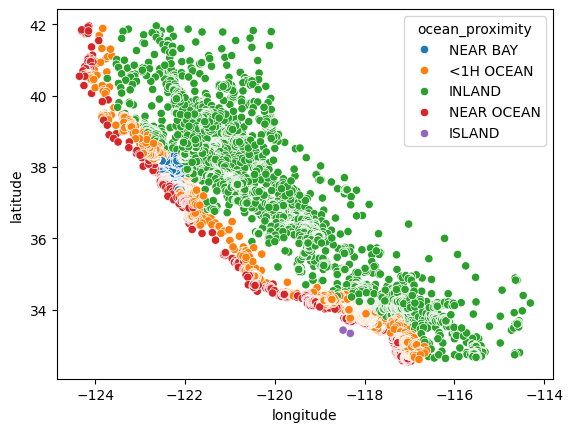

In [13]:
import seaborn as sns
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity')

Above we had to ignore the qualitative variable `ocean_proximity`. How could we analyze the relationship between `ocean_proximity` and the target variable `median_house_value`?

In [14]:
housing.groupby("ocean_proximity").median()[['median_house_value']]

,median_house_value
ocean_proximity,
<1H OCEAN,214850.0
INLAND,108500.0
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0


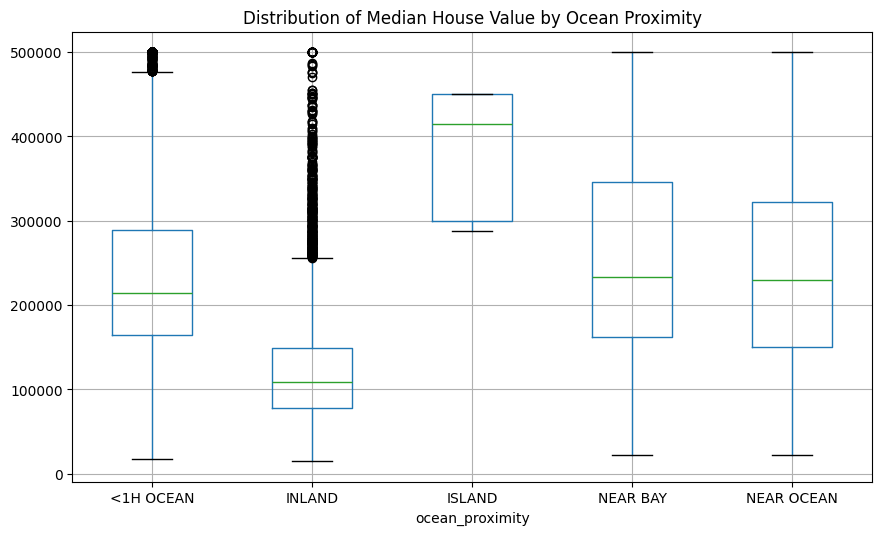

In [15]:
housing.boxplot(column='median_house_value', by='ocean_proximity', figsize=(10, 6))
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.suptitle('')  # Remove the automatic title that boxplot adds
plt.show()

What is the most promising feature to predict `median_house_value`?

> Qualitatively, the `median_income` seems to be the most correlated with the target variable `median_house_value`

Are there some features that are strongly correlated with each other?

> Yes, the features `total_rooms`, `total_bedrooms`, `population`, and `households` are strongly correlated with each other.

*Optional*: Some of the scatter plots (above and in the following) look more informative if you remove "outliers" using the following function.

In [16]:
def remove_outliers(data: pd.DataFrame, lower_quantile=0.01, upper_quantile=0.99):
    """
    Remove outliers from each column in a quantitative (!) DataFrame based on quantile thresholds.
    Keeps only rows where all columns are within the specified quantile range.
    Returns a new DataFrame without outliers.
    """
    quantiles = data.quantile([lower_quantile, upper_quantile])
    df_filtered = data.apply(
        lambda col: col[(col >= quantiles.loc[lower_quantile, col.name]) & (col <= quantiles.loc[upper_quantile, col.name])]
    ).dropna()
    return df_filtered


### 4. Simple data transformations

Here, we perform some data transformations, such as data cleaning and feature engineering.

#### 4.1 Data cleaning

Let us start by removing any row containing NAs.

In [17]:
housing.shape

(20640, 10)

In [18]:
housing.dropna() # returns a *new* dataframe without the na
housing.dropna(inplace = True) # modifies existing dataframe by removing the na rows

In [19]:
housing.shape

(20433, 10)

#### 4.2 Feature engineering

Consider the columns `total_rooms` and `total_bedrooms`, which describe the total number of rooms and bedrooms in a district, and  `population` and `households`, which describe the population and the number of households in a district.
However, the total number of rooms in a district is not very informative if we don't know the number of households.
Similarly, the number of bedrooms might be more useful if we put it in relation to the total number of rooms.
Finally, one might be interested in the number of people per household, rather than the total population itself.

Based on the observations above, create three new features (i.e., columns) that can be more useful than the existing  `total_rooms`, `total_bedrooms`, `population`, and `households`.

In [20]:
housing["rooms_per_bedroom"] = housing["total_rooms"] / housing["total_bedrooms"]
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["people_per_household"] = housing["population"] / housing["households"]

At this point, look at the scatter matrix of the newly created columns.

In [21]:
new_vars = housing[["rooms_per_bedroom", "rooms_per_household", "people_per_household", "median_house_value"]]
new_vars = remove_outliers(new_vars)


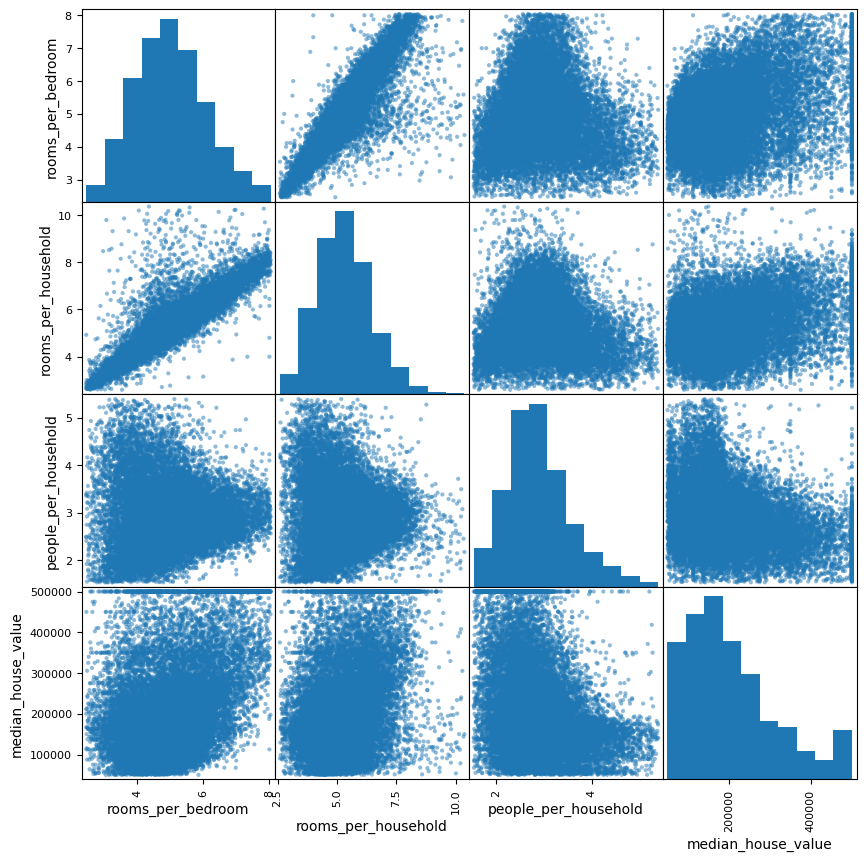

In [22]:

scatter_matrix(new_vars, figsize = (10, 10));

Compute the correlation among the new variables. Also, compute the correlation between  `total_rooms`, `total_bedrooms`, `population`, and `households`. What do you observe?

In [23]:
new_vars.corr()

,rooms_per_bedroom,rooms_per_household,people_per_household,median_house_value
rooms_per_bedroom,1.000000,0.873978,0.005602,0.365723
rooms_per_household,0.873978,1.000000,-0.046285,0.311659
people_per_household,0.005602,-0.046285,1.000000,-0.298935
median_house_value,0.365723,0.311659,-0.298935,1.000000


In [24]:
housing[["total_rooms", "total_bedrooms", "population", "households", "median_house_value"]].corr()

,total_rooms,total_bedrooms,population,households,median_house_value
total_rooms,1.000000,0.930380,0.857281,0.918992,0.133294
total_bedrooms,0.930380,1.000000,0.877747,0.979728,0.049686
population,0.857281,0.877747,1.000000,0.907186,-0.025300
households,0.918992,0.979728,0.907186,1.000000,0.064894
median_house_value,0.133294,0.049686,-0.025300,0.064894,1.000000


#### 4.3 Categorical variables

The column `ocean_proximity` is a qualitative variable with different categories. It is always good to convert qualitative variables into quantitative before fitting machine learning models. To do so, we will use the `OrdinalEncoder` function from the `preprocessing` package of the `sklearn` library.

Import the `OrdinalEncoder` class.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

We first instantiate an object from class `OrdinalEncoder` and we call it `my_ordinal_encoder`.

In [26]:
my_ordinal_encoder = OrdinalEncoder()
my_ordinal_encoder = OrdinalEncoder(categories = [['ISLAND', 'NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND']])

Create a new column named `ocean_proximity_enc` by transforming the `ocean_proximity` column with the `my_ordinal_encoder.fit_transform` function.

_Hint_: Make sure you access the `ocean_proximity` column with the double bracket `[[` and not with the single bracket `[`.

In [27]:
housing["ocean_proximity_enc"] = my_ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20433 non-null  float64
 1   latitude              20433 non-null  float64
 2   housing_median_age    20433 non-null  float64
 3   total_rooms           20433 non-null  float64
 4   total_bedrooms        20433 non-null  float64
 5   population            20433 non-null  float64
 6   households            20433 non-null  float64
 7   median_income         20433 non-null  float64
 8   median_house_value    20433 non-null  float64
 9   ocean_proximity       20433 non-null  object 
 10  rooms_per_bedroom     20433 non-null  float64
 11  rooms_per_household   20433 non-null  float64
 12  people_per_household  20433 non-null  float64
 13  ocean_proximity_enc   20433 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.3+ MB


In [52]:
housing[["ocean_proximity_enc"]].sample(10)

,ocean_proximity_enc
17971,3.0
4333,3.0
3073,4.0
10514,3.0
2952,4.0
2964,4.0
16942,1.0
182,2.0
13199,4.0
16057,2.0


### 5. Prepare data for machine learning algorithms

Create a "clean" dataset, without the columns `total_rooms`, `total_bedrooms`, `population`, `households`, and `ocean_proximity`.
Split the new dataset into predictors `X` and response `y`. 

In [28]:
housing_clean = housing.drop(["total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis = "columns")

In [29]:
X = housing_clean.drop(["median_house_value"], axis = "columns")
y = housing_clean[["median_house_value"]]

If we fit and evaluate our model on the same data we obtain overly optimistic results. For this reason, we have to split the dataset into a train and test part.

*Note: See next week's slides for details on this concept*

Split the data by keeping 20% of the observations in the test set. Set the random seed to `42`.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 6. Fit simple models

We are now ready to fit our first two models, KNN and LinearRegression.

Let us first fit a KNN model with $k=8$ (fill the `??`).

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Let us now fit a Linear Regression model (fill the `??`)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 7. Make predictions and evaluate models

We now want to make some predictions on test set, i.e., `X_test`, and to evaluate how well the models perform.

Predict the fitted models on the test set `X_test`.

_Hint_: use the `<fitted_object>.predict` function.

In [36]:
knn_preds = knn.predict(X_test)
knn_preds

array([[197712.5],
       [154487.5],
       [216787.5],
       ...,
       [ 98950. ],
       [129662.5],
       [114275. ]], shape=(4087, 1))

In [37]:
lin_reg_preds = lin_reg.predict(X_test)
lin_reg_preds

array([[226471.97981885],
       [169421.6127461 ],
       [195866.61499015],
       ...,
       [110991.08570684],
       [143590.75652925],
       [174478.95885867]], shape=(4087, 1))

Evaluate the performance of the models using the root mean square error (RMSE). Fill the `??`.

In [38]:
from sklearn.metrics import root_mean_squared_error

In [39]:
root_mean_squared_error(knn_preds, y_test)

61352.14536011822

In [40]:
root_mean_squared_error(lin_reg_preds, y_test)

73091.54083495017

*Optional:* Can you also compute these errors without using any library function (i.e., by using only `numpy`)?

In [41]:
np.sqrt(np.mean((knn_preds - y_test)**2, axis=0))

median_house_value    61352.14536
dtype: float64

In [42]:
np.sqrt(np.mean((lin_reg_preds - y_test)**2, axis=0))

median_house_value    73091.540835
dtype: float64

## Problem 2


In this problem, we show that the regression function $f^*(x) := \operatorname{E}[Y \mid X = x]$, $x \in \mathbb{R}^p$, is **optimal** in the sense that it minimizes the expected squared prediction error.

In particular, for a fixed predictor value $x \in \mathbb{R}^p$, show that

$$f^*(x) = 
\underset{g(x)}{\operatorname{arg min}} \operatorname{E}\left[\left(Y - g(x)\right)^2 \mid X = x\right].$$

Since we consider just a single value of $x$, we can substitute $q := g(x)$ and denote
$$h(q) = \operatorname{E}\left[\left(Y - q\right)^2 \mid X = x\right].$$
The value of the original minimization problem can then be expressed as
$$
f^*(x)
= 
\underset{g(x)}{\operatorname{arg min}} \operatorname{E}\left[\left(Y - g(x)\right)^2 \mid X = x\right]
=
\underset{q}{\operatorname{arg min}} \, h(q)
=:
q^*
.
$$
Using the linearity of the (conditional) expectation, we can rewrite $h(q)$ as
\begin{align*}
h(q)
&=
\operatorname{E}\left[Y^2 - 2 Y q + q^2 \mid X = x\right]
\\
&=
\operatorname{E}\left[Y^2 \mid X = x\right]
-\operatorname{E}\left[2 Y q \mid X = x\right]
+\operatorname{E}\left[q^2 \mid X = x\right]
\\
&=
\operatorname{E}\left[Y^2 \mid X = x\right]
-2q\operatorname{E}\left[Y \mid X = x\right]
+q^2
\end{align*}

This function is a polynomial of degree two with positive leading coefficient ($1$), so we can compute its minimum by settings its derivative $h'(q)$ to zero:
\begin{align*}
0
&=
h'(q)
\\ &=
-2\operatorname{E}\left[Y \mid X = x\right]
+2q
\\
\Rightarrow
q^*
&=
\operatorname{E}\left[Y \mid X = x\right]
,
\end{align*}

and hence $f^*(x) = q^* = \operatorname{E}[Y \mid X = x]$.

**Consequence in the regression setting:**
The true data-generating process is
$$
Y = f(X) + \varepsilon,
$$
for some fixed $f$,
with $\operatorname{E}[\varepsilon] = 0$, independent of $X$.
Then the best estimator is
\begin{align*}
f^*(x)
&=
\operatorname{E}[Y \mid X = x]
\\&=
\operatorname{E}[f(X) + \varepsilon \mid X = x]
\\&=
\operatorname{E}[f(X) \mid X = x]
+
\operatorname{E}[\varepsilon \mid X = x]
\\ &=
f(x) + 0
.
\end{align*}
Hence, we should try find the "true" function $f$.